In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 12s 6ms/step - loss: 1.6949 - accuracy: 0.5082 - val_loss: 0.5510 - val_accuracy: 0.8343
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4005 - accuracy: 0.8783 - val_loss: 0.2816 - val_accuracy: 0.9178
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2573 - accuracy: 0.9225 - val_loss: 0.1988 - val_accuracy: 0.9415
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1937 - accuracy: 0.9422 - val_loss: 0.1589 - val_accuracy: 0.9511
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1553 - accuracy: 0.9534 - val_loss: 0.1235 - val_accuracy: 0.9625


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.1125 - accuracy: 0.9652 - val_loss: 0.0554 - val_accuracy: 0.9822
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0381 - val_accuracy: 0.9878
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0293 - val_accuracy: 0.9906


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history3 = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0379 - val_accuracy: 0.9890
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0438 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0314 - val_accuracy: 0.9908


In [8]:
sgd_training_acc = history1.history['accuracy']
sgd_val_acc = history1.history['val_accuracy']
sgd_loss =history1.history['loss']

adam_training_acc = history2.history['accuracy']
adam_val_acc = history2.history['val_accuracy']
adam_loss =history2.history['loss']

rmsprop_training_acc = history3.history['accuracy']
rmsprop_val_acc = history3.history['val_accuracy']
rmsprop_loss =history3.history['loss']

Text(0.5, 0, 'RMSProp Validation Accuracy')

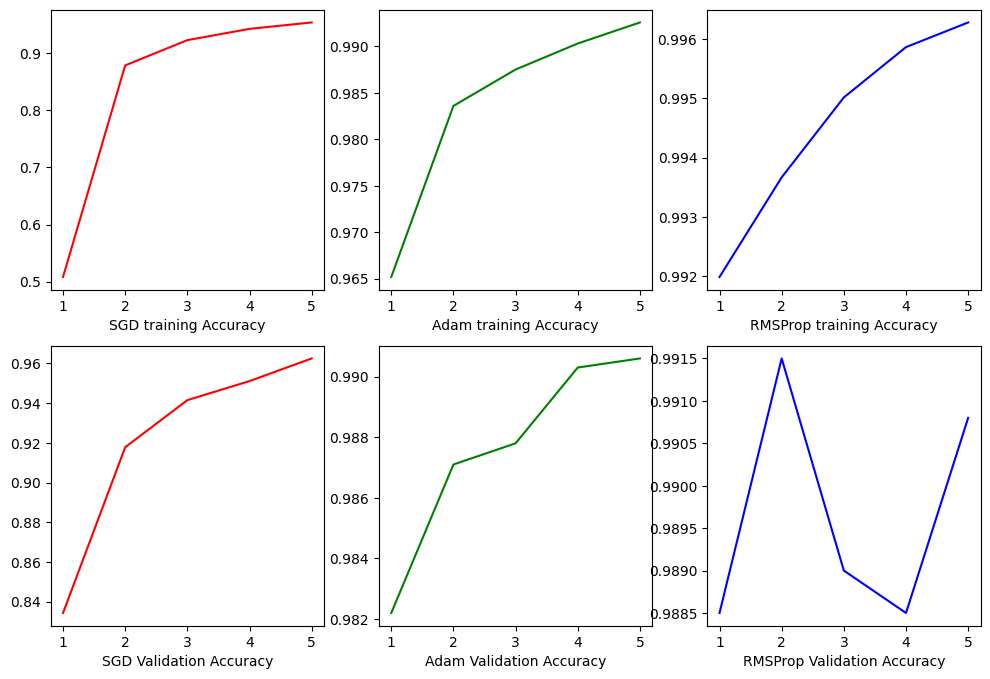

In [9]:
list = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes[0, 0].plot(list, sgd_training_acc, label='SGD training Accuracy', color='r')
axes[0, 0].set_xlabel('SGD training Accuracy')
axes[1, 0].plot(list, sgd_val_acc, label='SGD Validation Accuracy', color='r')
axes[1, 0].set_xlabel('SGD Validation Accuracy')


axes[0, 1].plot(list, adam_training_acc, label='Adam training Accuracy', color='g')
axes[0, 1].set_xlabel('Adam training Accuracy')
axes[1, 1].plot(list, adam_val_acc, label='SGD Validation Accuracy', color='g')
axes[1, 1].set_xlabel('Adam Validation Accuracy')


axes[0, 2].plot(list, rmsprop_training_acc, label='RMSProp training Accuracy', color='b')
axes[0, 2].set_xlabel('RMSProp training Accuracy')
axes[1, 2].plot(list, rmsprop_val_acc, label='RMSProp Validation Accuracy', color='b')
axes[1, 2].set_xlabel('RMSProp Validation Accuracy')

Text(0.5, 1.0, 'RmsProp LOSS')

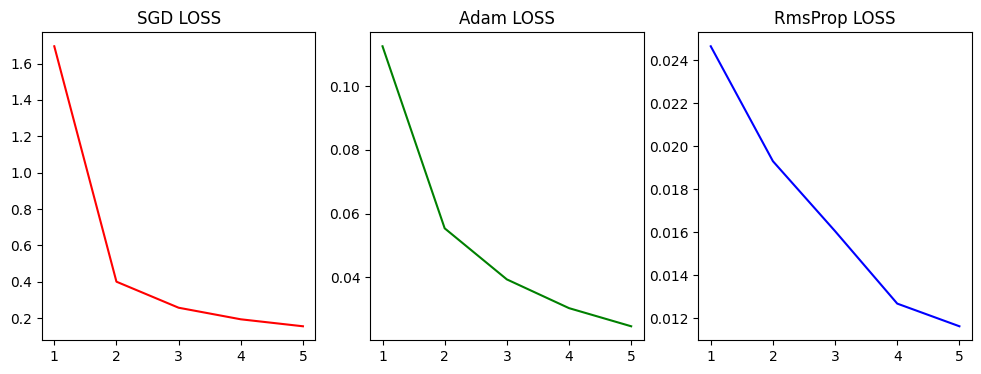

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(list, sgd_loss, color='r')
ax1.set_title('SGD LOSS')

ax2.plot(list, adam_loss , color='g')
ax2.set_title('Adam LOSS')

ax3.plot(list, rmsprop_loss, color='b')
ax3.set_title('RmsProp LOSS')